In [1]:
import pyucalgarysrs
import datetime

In [2]:
srs = pyucalgarysrs.PyUCalgarySRS()
start_dt = datetime.datetime(2020, 3, 21, 6, 30, 0)
end_dt = datetime.datetime(2020, 3, 21, 6, 35, 59)

In [3]:
res = srs.data.download("TREX_RGB_RAW_NOMINAL", start_dt, end_dt, site_uid="gill", overwrite=True)

In [4]:
data = srs.data.read(res.dataset, res.filenames, n_parallel=2)

In [5]:
data.data

array([[[[ 5,  8,  4, ...,  6,  5,  6],
         [ 6,  6,  5, ...,  6,  5,  6],
         [ 6,  6,  6, ...,  8,  5,  6]],

        [[ 6,  7,  4, ...,  6,  5,  7],
         [ 6,  5,  6, ...,  6,  5,  6],
         [ 6,  7,  6, ...,  9,  6,  6]],

        [[ 5,  5,  6, ...,  6,  6,  5],
         [ 5,  5,  6, ...,  6,  7,  6],
         [ 5,  4,  6, ...,  9,  7,  5]],

        ...,

        [[ 5,  5,  4, ...,  5,  6,  6],
         [ 5,  5,  4, ...,  5,  5,  5],
         [ 6,  3,  4, ...,  5,  6,  5]],

        [[ 5,  3,  4, ...,  6,  6,  5],
         [ 6,  4,  5, ...,  6,  5,  6],
         [ 6,  3,  4, ...,  6,  5,  4]],

        [[ 3,  3,  5, ...,  6,  7,  5],
         [ 5,  3,  6, ...,  5,  5,  5],
         [ 6,  3,  4, ...,  8,  5,  4]]],


       [[[ 5,  5,  3, ...,  7,  6,  5],
         [ 5,  4,  4, ...,  7,  6,  6],
         [ 5,  6,  3, ...,  7,  4,  5]],

        [[ 7,  7,  4, ...,  5,  4,  6],
         [ 5,  6,  5, ...,  6,  6,  6],
         [ 7,  7,  4, ...,  8,  4,  4]],

        

In [6]:
import numpy as np

scale_min = 15.0  # MUST be a float
scale_max = 120.0  # MUST be a float

scale_diff = scale_max - scale_min
scale_ratio = 255.0 / scale_diff
im_scaled = (data.data[:, :, :, :] - scale_min) * scale_ratio  # apply scale
im_scaled = im_scaled.clip(0, 255) + 0.5  # limit to 0-65535 (the range of a 16-bit image)
im_scaled = im_scaled.astype(np.uint8)  # convert data type to 16-bit

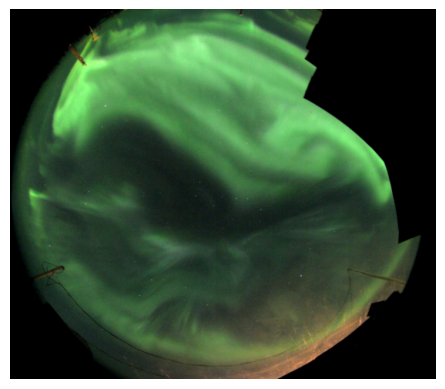

In [7]:
import matplotlib.pyplot as plt
plt.imshow(im_scaled[:,:,:,0], origin="lower")
plt.axis("off")
plt.show()

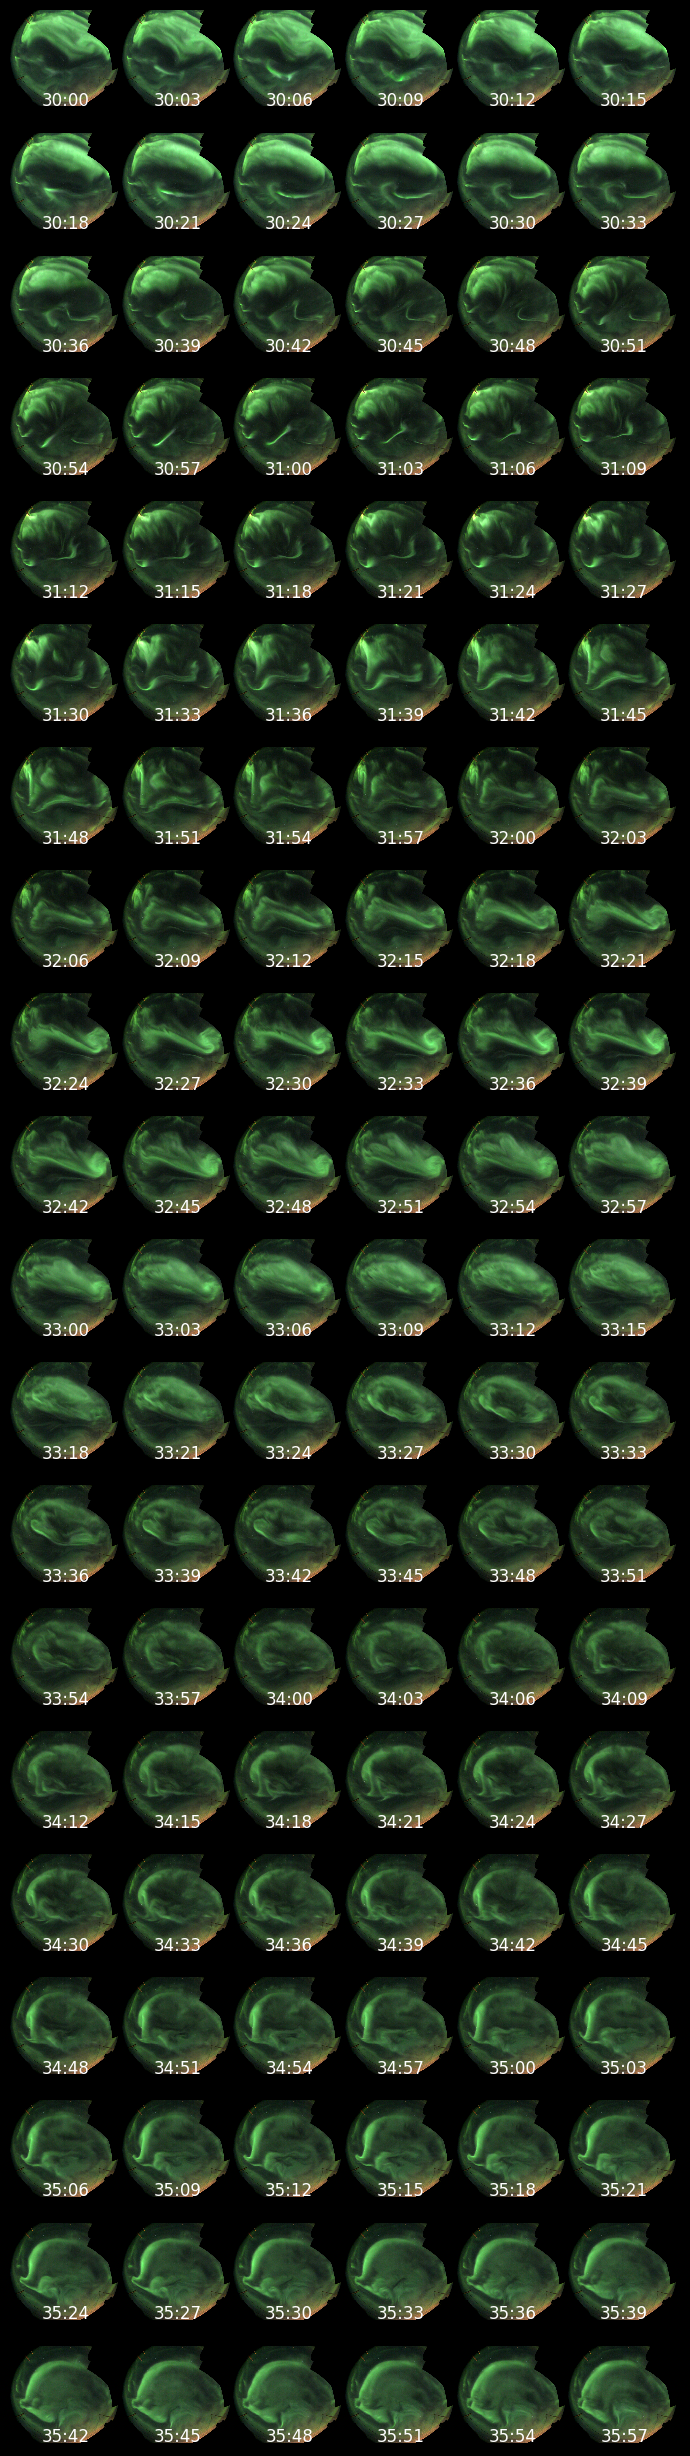

In [8]:
plt.style.use("dark_background")

rows = 20
cols = 6
figsize = (7, 25)
timestamps_format = "%M:%S"
timestamps_fontsize = 12
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
for ax, i in zip(axs.flat, range(0, len(data.timestamp))):
    ax.imshow(im_scaled[:, :, :, i], cmap="grey", origin="lower", interpolation="nearest")
    ax.set_axis_off()

    # show timestamp
    ax.text(
        int(np.floor(im_scaled.shape[1] / 2.)),
        5,
        data.timestamp[i].strftime(timestamps_format),
        ha="center",
        fontsize=timestamps_fontsize,
    )
plt.tight_layout(h_pad=0, w_pad=0)